# Loading the fashion MNIST dataset

In [1]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense, Flatten

In [2]:
df = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train ), ( x_test ,y_test ) = df.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit- Learn, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).

In [4]:
print( "Shape of x_train : ",x_train.shape)
print("shape of y_train : ",y_train.shape)

Shape of x_train :  (60000, 28, 28)
shape of y_train :  (60000,)


![digit](digit.png)

In [5]:
import matplotlib.pyplot as plt

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'dress', 'Coat', 'Sandal', 
               'shirt', 'sneaker', 'Bag', 'Ankle boots']

Text(0.5, 1.0, 'Ankle boots')

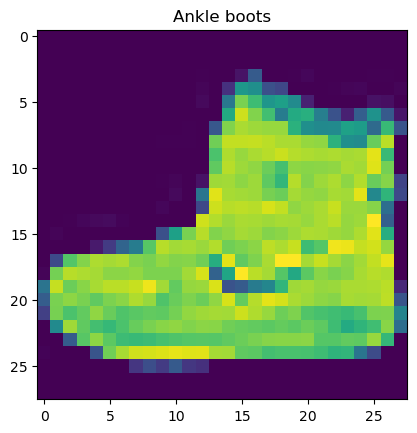

In [7]:
sample = x_train[0]
item = class_names[y_train[0]]
plt.imshow(sample)
plt.title(item)

## Scaling the inputs

In [8]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

## Creating a neural network

In [9]:
model = keras.models.Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

/Users/yash/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,910 (1.36 MB)

 Trainable params: 356,910 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy']
              )

In [14]:
history = model.fit(x_train_scaled, y_train,epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7740 - loss: 0.6291 - val_accuracy: 0.8528 - val_loss: 0.4018
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8588 - loss: 0.3807 - val_accuracy: 0.8700 - val_loss: 0.3628
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8753 - loss: 0.3358 - val_accuracy: 0.8727 - val_loss: 0.3611
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8813 - loss: 0.3180 - val_accuracy: 0.8783 - val_loss: 0.3314
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8908 - loss: 0.2880 - val_accuracy: 0.8827 - val_loss: 0.3289
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8956 - loss: 0.2760 - val_accuracy: 0.8752 - val_loss: 0.3445
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9016 - loss: 0.2574 - val_accuracy: 0.8874 - val_loss: 0.3240
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9030 - loss: 0.2514 - 

In [15]:
y_prob = model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8784

## Plotting history plots

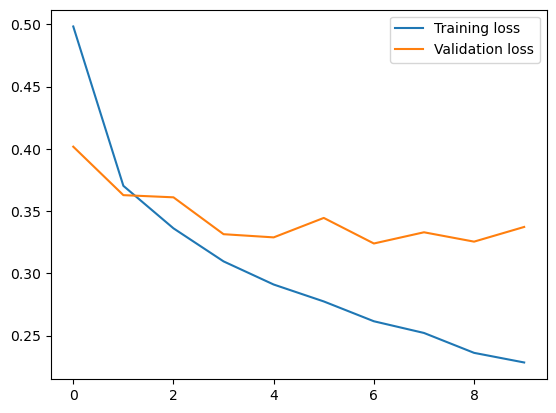

In [18]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

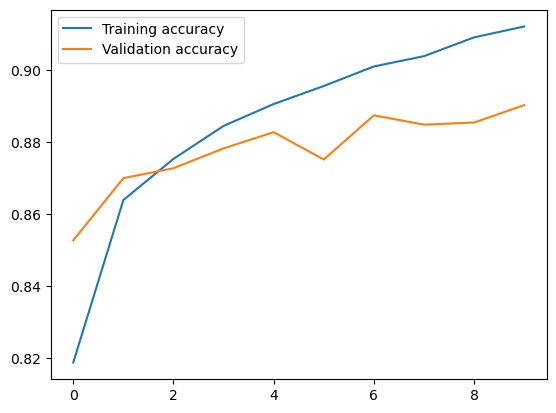

In [19]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()

## Testing your model

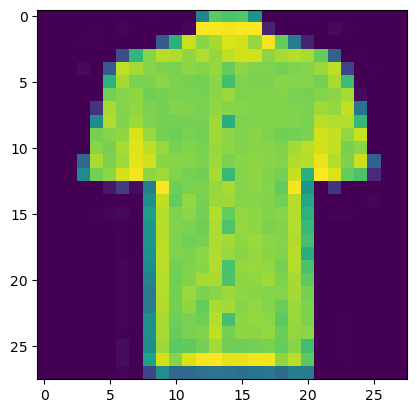

In [28]:
plt.imshow(x_test[40])

In [29]:
output = class_names[y_pred[40]]
output

'T-shirt/top'